In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Import Data

In [2]:
df_raw = pd.read_csv('data/Sample_Data.csv')

/Users/redstockings/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10,13,14,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_raw.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,...,1,1,2,1,1,36000,3204,60,70,Yes
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,...,1,1,2,1,1,36000,3204,60,70,No
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,...,1,1,2,1,1,36000,3204,60,70,No
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,...,1,2,2,1,1,5000,1068,250,320,No
4,4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,...,2,1,2,2,2,21260,2136,120,100,No


In [4]:
# remove "unnamed" column
df_raw = df_raw.iloc[:,1:]

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [6]:
Target_provider = pd.read_csv('data/Train-1542865627584.csv')

### 2. Aggregate features grouped by Providers

#### 2.1 BeneID

In [7]:
ClaimCount = df_raw.groupby(['Provider']).ClaimID.count()

In [8]:
uniqBeneCount = df_raw.groupby(['Provider']).BeneID.nunique()
uniqBeneCount.name = 'uniqBeneCount'

In [9]:
ClaimCount - uniqBeneCount  # There are some duplicated beneficiaries

Provider
PRV51001      1
PRV51003     15
PRV51004     11
PRV51005    670
PRV51007     14
           ... 
PRV57759      4
PRV57760     13
PRV57761     15
PRV57762      0
PRV57763     48
Length: 5410, dtype: int64

In [10]:
Target_uniqueBeneCount = Target_provider.merge(uniqBeneCount,on = 'Provider')

(0.0, 1000.0)

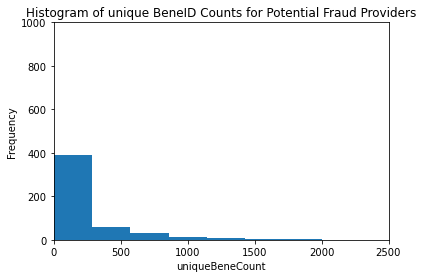

In [52]:
Target_uniqueBeneCount[Target_uniqueBeneCount.PotentialFraud == 'Yes'].uniqBeneCount.plot(kind = 'hist')
plt.xlabel('uniqueBeneCount')
plt.title('Histogram of unique BeneID Counts for Potential Fraud Providers')
plt.xlim((0,2500))
plt.ylim((0,1000))

(0.0, 5000.0)

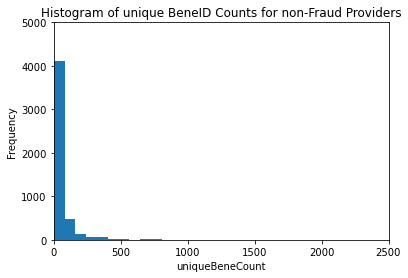

In [12]:
Target_uniqueBeneCount[Target_uniqueBeneCount.PotentialFraud == 'No'].uniqBeneCount.plot(kind = 'hist')
plt.xlabel('uniqueBeneCount')
plt.title('Histogram of unique BeneID Counts for non-Fraud Providers')
plt.xlim((0,2500))
plt.ylim((0,5000))

In [13]:
ClmsperBene = ClaimCount/uniqBeneCount
ClmsperBene.name = 'ClmsperBene'

In [14]:
Target_ClmsperBene = Target_provider.merge(ClmsperBene,on = 'Provider')

(0.0, 1000.0)

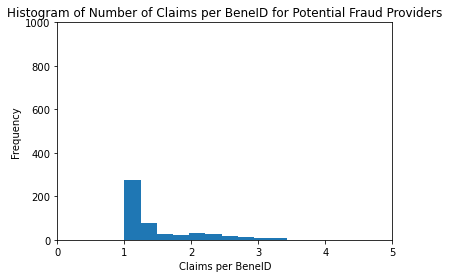

In [53]:
Target_ClmsperBene[Target_ClmsperBene.PotentialFraud == 'Yes'].ClmsperBene.plot(kind = 'hist')
plt.xlabel('Claims per BeneID')
plt.title('Histogram of Number of Claims per BeneID for Potential Fraud Providers')
plt.xlim((0,5))
plt.ylim((0,1000))

(0.0, 5000.0)

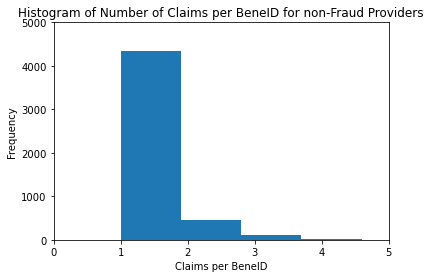

In [16]:
Target_ClmsperBene[Target_ClmsperBene.PotentialFraud == 'No'].ClmsperBene.plot(kind = 'hist')
plt.xlabel('Claims per BeneID')
plt.title('Histogram of Number of Claims per BeneID for non-Fraud Providers')
plt.xlim((0,5))
plt.ylim((0,5000))

#### 2.2 InscClaimAmtReimbursed

In [17]:
TotalClmAmtReim = df_raw.groupby(['Provider']).InscClaimAmtReimbursed.sum()
TotalClmAmtReim.name = "TotalClmAmtReim"

In [18]:
MeanClmAmtReim = df_raw.groupby(['Provider']).InscClaimAmtReimbursed.mean()
MeanClmAmtReim.name = 'MeanClmAmtReim'

In [19]:
MaxClmAmtReim = df_raw.groupby(['Provider']).InscClaimAmtReimbursed.max()
MaxClmAmtReim.name = 'MaxClmAmtReim'

PotentialFraud
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TotalClmAmtReim, dtype: object

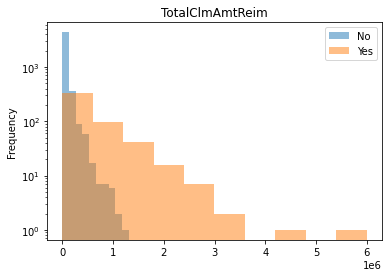

In [51]:
Target_TotalClmAmtReim = Target_provider.merge(TotalClmAmtReim,on = 'Provider')
Target_TotalClmAmtReim.groupby(['PotentialFraud']).TotalClmAmtReim.plot(kind = 'hist', alpha = 0.5, title = 'TotalClmAmtReim', legend = True, logy = True)

PotentialFraud
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MeanClmAmtReim, dtype: object

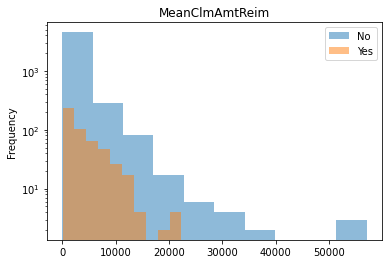

In [50]:
Target_provider.merge(MeanClmAmtReim,on = 'Provider').groupby(['PotentialFraud']).MeanClmAmtReim.plot(kind = 'hist', alpha = 0.5, title = 'MeanClmAmtReim', legend = True, logy = True)

PotentialFraud
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MaxClmAmtReim, dtype: object

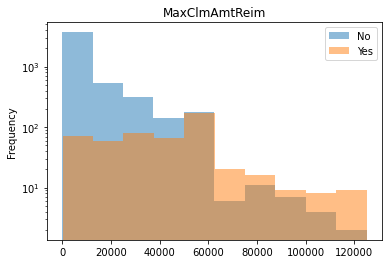

In [49]:
Target_provider.merge(MaxClmAmtReim,on = 'Provider').groupby(['PotentialFraud']).MaxClmAmtReim.plot(kind = 'hist', alpha = 0.5, title = 'MaxClmAmtReim', legend = True, logy = True)

#### 2.3 AttendingPhysician

In [23]:
uniqATPhysnCount= df_raw.groupby(['Provider']).AttendingPhysician.nunique()

In [24]:
ClmsperATPhysn = ClaimCount/uniqATPhysnCount
ClmsperATPhysn.name = 'ClmsperATPhysn'

PotentialFraud
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ClmsperATPhysn, dtype: object

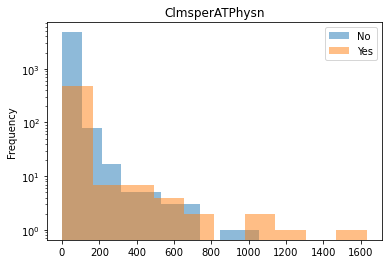

In [48]:
Target_provider.merge(ClmsperATPhysn,on = 'Provider').groupby(['PotentialFraud']).ClmsperATPhysn.plot(kind = 'hist', alpha = 0.5, title = 'ClmsperATPhysn', legend = True, logy = True)

#### 2.4 OperatingPhysician

In [26]:
uniqOPPhysnCount = df_raw.groupby(['Provider']).OperatingPhysician.nunique()

In [27]:
ClmsperOPPhysn = ClaimCount/uniqOPPhysnCount
ClmsperOPPhysn.name = 'ClmsperOPPhysn'

In [28]:
# There are inf values in ClmsperOPPhysn because in some claims OPPhysn is 0. Replace inf by -99.
ClmsperOPPhysn.replace(np.inf,-99,inplace = True)

PotentialFraud
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ClmsperOPPhysn, dtype: object

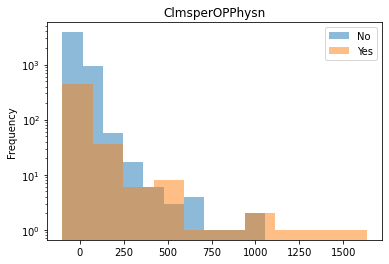

In [47]:
Target_provider.merge(ClmsperOPPhysn,on = 'Provider').groupby(['PotentialFraud']).ClmsperOPPhysn.plot(kind = 'hist', alpha = 0.5, title = 'ClmsperOPPhysn', legend = True, logy = True)

#### 2.5 OtherPhysician

In [30]:
uniqOTPhysnCount = df_raw.groupby(['Provider']).OtherPhysician.nunique()

In [31]:
ClmsperOTPhysn = ClaimCount/uniqOTPhysnCount
ClmsperOTPhysn.name = 'ClmsperOTPhysn'

In [32]:
# There are inf values in ClmsperOTPhysn because in some claims OPPhysn is 0. Replace inf by -99.
ClmsperOTPhysn.replace(np.inf,-99,inplace = True)

PotentialFraud
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ClmsperOTPhysn, dtype: object

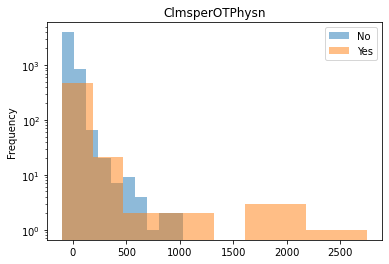

In [46]:
Target_provider.merge(ClmsperOTPhysn,on = 'Provider').groupby(['PotentialFraud']).ClmsperOTPhysn.plot(kind = 'hist', alpha = 0.5, title = 'ClmsperOTPhysn', legend = True, logy= True)

#### 2.6 In_Out

In [41]:
InClmsPct = df_raw.groupby(['Provider']).In_Out.sum()/ClaimCount  # 1 means in patient clms

In [43]:
InClmsPct.name = 'InClmsPct'  # Number of inpatient claims

PotentialFraud
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: InClmsPct, dtype: object

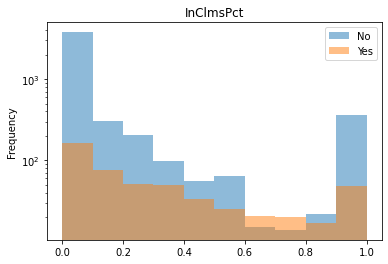

In [45]:
Target_provider.merge(InClmsPct,on = 'Provider').groupby(['PotentialFraud']).InClmsPct.plot(kind = 'hist', alpha = 0.5, title = 'InClmsPct', legend = True, logy = True)

### Export Data Table for Team

In [305]:
data = {'uniqBeneCount':uniqBeneCount,
        'ClmsperBene':ClmsperBene, 
        'TotalInscClaimAmtReimbursed':TotalClmAmtReim,
        'MeanInscClaimAmtReimbursed':MeanClmAmtReim,
        'MaxInscClaimAmtReimbursed':MaxClmAmtReim,
        'uniqATPhysnCount':uniqATPhysnCount,
        'ClmsperATPhysn':ClmsperATPhysn,
        'uniqOPPhysnCount':uniqOPPhysnCount,
        'ClmsperOPPhysn':ClmsperOPPhysn,
        'uniqOTPhysnCount':uniqOTPhysnCount,
        'ClmsperOTPhysn':ClmsperOTPhysn,
        'InClmsPct':InClmsPct}
df_provider_mz = pd.DataFrame(data = data)

In [308]:
df_provider_mz.tail(10)

,uniqBeneCount,ClmsperBene,TotalInscClaimAmtReimbursed,MeanInscClaimAmtReimbursed,MaxInscClaimAmtReimbursed,uniqATPhysnCount,ClmsperATPhysn,uniqOPPhysnCount,ClmsperOPPhysn,uniqOTPhysnCount,ClmsperOTPhysn,InClmsPct
Provider,,,,,,,,,,,,
PRV57754,6,1.000000,2070,345.000000,1100,1,6.000000,1,6.000000,1,6.0,0.0
PRV57755,1,1.000000,300,300.000000,300,1,1.000000,1,1.000000,1,1.0,0.0
PRV57756,27,1.000000,3790,140.370370,800,3,9.000000,2,13.500000,2,13.5,0.0
PRV57757,11,1.000000,109000,9909.090909,38000,1,11.000000,3,3.666667,1,11.0,1.0
PRV57758,2,1.000000,110,55.000000,100,1,2.000000,0,-99.000000,0,-99.0,0.0
PRV57759,24,1.166667,10640,380.000000,3300,1,28.000000,1,28.000000,1,28.0,0.0
PRV57760,9,2.444444,4770,216.818182,1100,3,7.333333,2,11.000000,2,11.0,0.0
PRV57761,67,1.223881,18470,225.243902,2200,2,41.000000,5,16.400000,2,41.0,0.0
PRV57762,1,1.000000,1900,1900.000000,1900,1,1.000000,0,-99.000000,0,-99.0,0.0


In [309]:
df_provider_mz.to_csv("df_provider_mz.csv")